In [8]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

(16338, 7, 128, 128)
(16338, 7, 128, 128)
Dataset contains 16338 images with 7 channels each, of size 128x128.


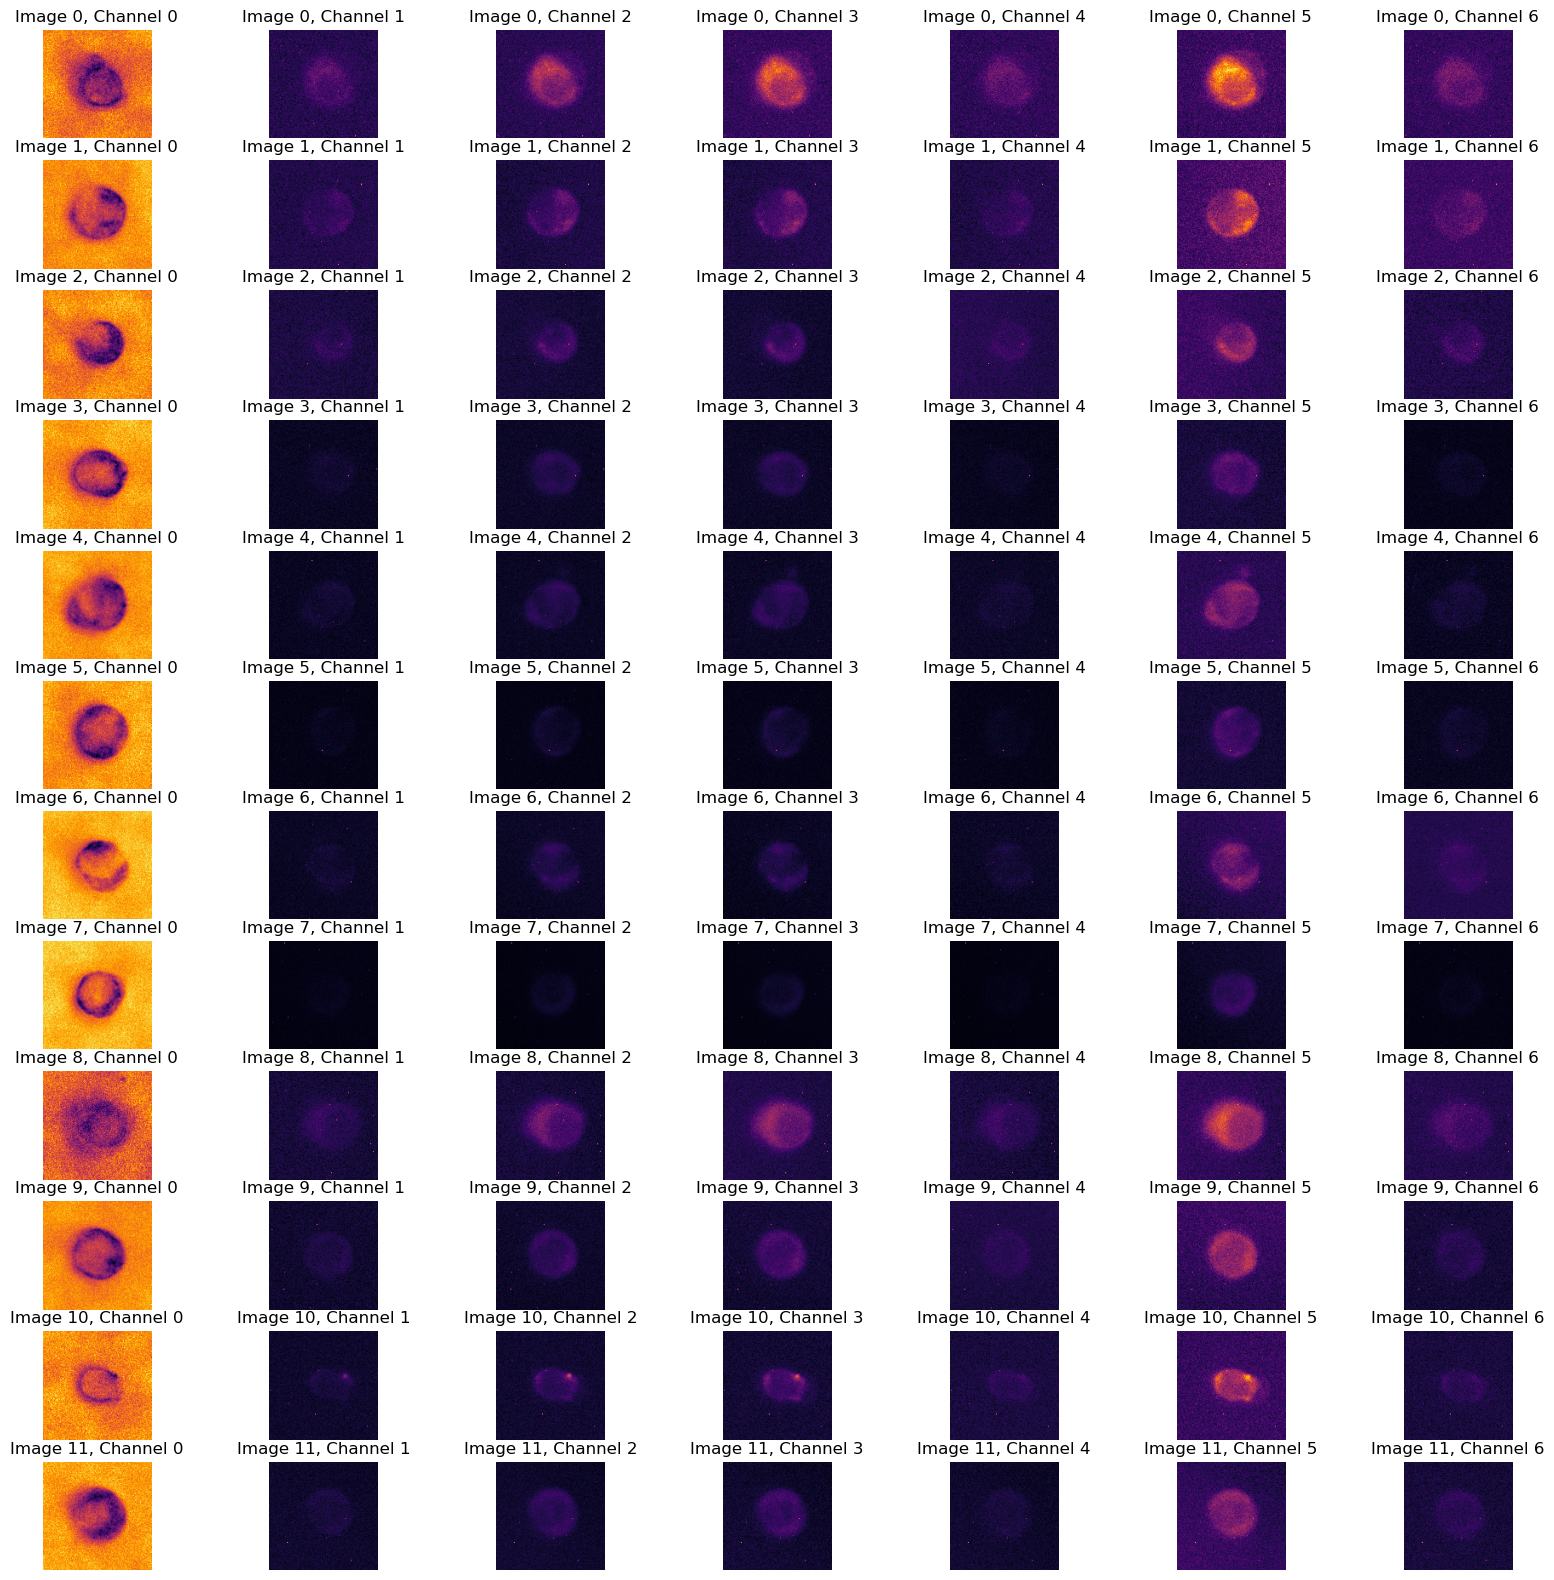

uint16
Dataset contains 16338 images with 7 channels each, of size 128x128.


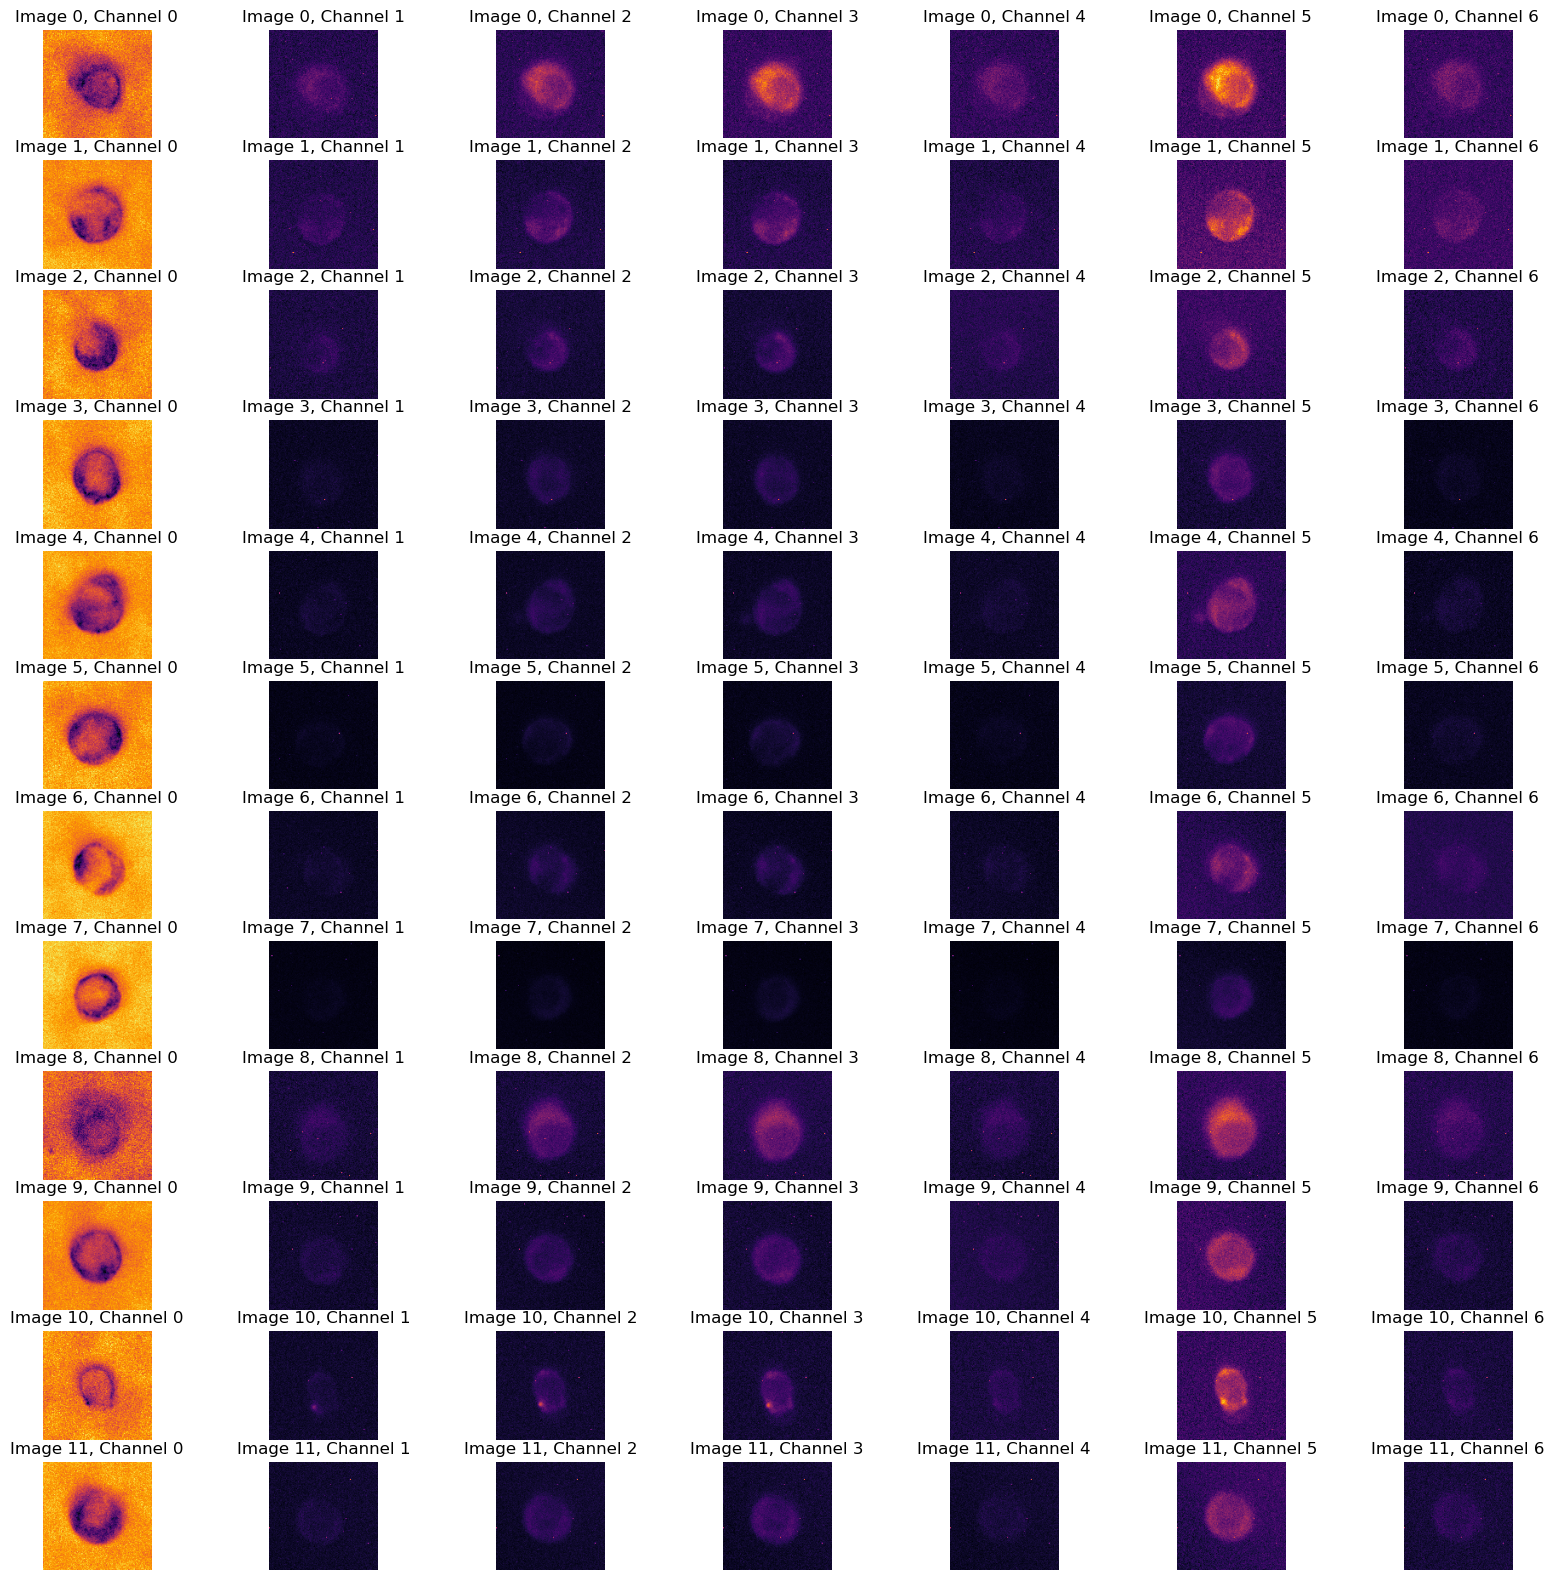

In [13]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

def display_images_from_hdf5(file_path, num_images_to_display=12):
    with h5py.File(file_path, 'r') as f:
        # Access the dataset
        images_dataset = f['images']
        print(images_dataset.shape)
        num_images, num_channels, height, width = images_dataset.shape
        print(images_dataset.shape)
        
        print(f"Dataset contains {num_images} images with {num_channels} channels each, of size {height}x{width}.")

        # Display the first few images
        plt.figure(figsize=(20, 20))
        for i in range(min(num_images_to_display, num_images)):
            for j in range(num_channels):
                img = images_dataset[i, j]
                plt.subplot(num_images_to_display, num_channels, i * num_channels + j + 1)
                plt.imshow(img, cmap='inferno')
                plt.title(f'Image {i}, Channel {j}')
                plt.axis('off')
            
        plt.show()
        return images_dataset
    
def display_transposedimages_from_hdf5(file_path, num_images_to_display=12):
    with h5py.File(file_path, 'r') as f:
        # Access the dataset
        images_dataset = f['images']
        print(images_dataset.dtype)
        num_images, height, width, num_channels = images_dataset.shape
        #print(images_dataset.shape)
        
        print(f"Dataset contains {num_images} images with {num_channels} channels each, of size {height}x{width}.")

        # Display the first few images
        
        plt.figure(figsize=(20, 20))
        for i in range(min(num_images_to_display, num_images)):
            for j in range(images_dataset.shape[-1]):  # Loop over channels in NHWC format
                img = images_dataset[i, :, :, j]
                plt.subplot(num_images_to_display, images_dataset.shape[-1], i * images_dataset.shape[-1] + j + 1)
                plt.imshow(img, cmap='inferno')
                plt.title(f'Image {i}, Channel {j}')
                plt.axis('off')
            
        plt.show()
        return images_dataset

    """"
def convert_and_store_images(input_file_path, output_file_path):
    with h5py.File(input_file_path, 'r') as f:
        # Access the dataset
        images_dataset = f['images']
        num_images, num_channels, height, width = images_dataset.shape
        print(f"Original dataset shape: {images_dataset.shape}")

        # Load the dataset into a numpy array
        images_array = np.array(images_dataset)
        
        # Transpose the dataset from NCHW to NHWC
        images_transposed = images_array.transpose(0, 3, 2, 1)
        print(f"Transposed dataset shape: {images_transposed.shape}")

        # Save the transposed dataset to a new HDF5 file
        with h5py.File(output_file_path, 'w') as f_out:
            f_out.create_dataset('images', data=images_transposed, dtype=images_transposed.dtype)
            print(f"Transposed dataset saved to {output_file_path}")

"""
# Usage
input_file_path = 'fluor_images.h5'
output_file_path = 'fluor_images_transposed.h5'

# Display images from the original dataset
images_dataset = display_images_from_hdf5(input_file_path)

# Convert and store the images in NHWC format
#convert_and_store_images(input_file_path, output_file_path)

# Display images from the transposed dataset
images_dataset_transposed = display_transposedimages_from_hdf5(output_file_path)


In [3]:
import h5py
import numpy as np

# Open the HDF5 file in read mode
with h5py.File('fluor_images_transposed.h5', 'r') as f:
    # Read the dataset
    data = f['images'][:]

# Convert the datatype (e.g., from uint16 to float32)
converted_data = data.astype(np.float32)

# Open the HDF5 file in write mode
with h5py.File('fluor_images_transposed_asfloat.h5', 'w') as f:
    # Create a new dataset with the converted data
    f.create_dataset('images', data=converted_data)

print("Datatype conversion complete.")


Datatype conversion complete.


In [25]:
with h5py.File('fluor_images_transposed_asfloat.h5', 'r') as f:
    # Read the dataset
    data = f['images'][:]
    numpy_array = np.array(data)
    np.savez_compressed('fluor_images_transposed_asnumpy.npz', array=numpy_array)


In [26]:
data = np.load('fluor_images_transposed_asnumpy.npz')

In [33]:
print(data.files)
data = data['array']

['array']


In [38]:
data.shape

(16338, 128, 128, 7)

In [39]:
#output_file_path = 'fluor_images_transposed_asfloat.h5'
#images_dataset_transposed = display_transposedimages_from_hdf5(output_file_path)

In [40]:
def brightfield_images(minimum_value, maximum_value, images_dataset):
    for i in range(images_dataset.shape[0]):
        img = images_dataset[i, :, :, 0]
        if(np.min(img) <minimum_value):
            minimum_value = np.min(img)
        if(np.max(img) > maximum_value):
            maximum_value = np.max(img)

    return [minimum_value, maximum_value] 

def channel1_images(minimum_value, maximum_value, images_dataset):
    for i in range(images_dataset.shape[0]):
        img = images_dataset[i, :, :, 1]
        if(np.min(img) <minimum_value):
            minimum_value = np.min(img)
        if(np.max(img) > maximum_value):
            maximum_value = np.max(img)
    return [minimum_value, maximum_value]


def channel2_images(minimum_value, maximum_value, images_dataset):
    for i in range(images_dataset.shape[0]):
        img = images_dataset[i, :, :, 2]
        if(np.min(img) < minimum_value):
            minimum_value = np.min(img)
        if(np.max(img) > maximum_value):
            maximum_value = np.max(img)

    return [minimum_value, maximum_value]

def channel3_images(minimum_value, maximum_value, images_dataset):
    for i in range(images_dataset.shape[0]):
        img = images_dataset[i, :, :, 3]
        if(np.min(img) < minimum_value):
            minimum_value = np.min(img)
        if(np.max(img) > maximum_value):
            maximum_value = np.max(img)
    return [minimum_value, maximum_value]

def channel4_images(minimum_value, maximum_value, images_dataset):
    for i in range(images_dataset.shape[0]):
        img = images_dataset[i, :, :, 4]
        if(np.min(img) < minimum_value):
            minimum_value = np.min(img)
        if(np.max(img) > maximum_value):
            maximum_value = np.max(img)
    return [minimum_value, maximum_value]

def channel5_images(minimum_value, maximum_value, images_dataset):
    for i in range(images_dataset.shape[0]):
        img = images_dataset[i, :, :, 5]
        if(np.min(img) < minimum_value):
            minimum_value = np.min(img)
        if(np.max(img) > maximum_value):
            maximum_value = np.max(img)
    return [minimum_value, maximum_value]

def channel6_images(minimum_value, maximum_value, images_dataset):
    for i in range(images_dataset.shape[0]):
        img = images_dataset[i, :, :, 6]
        if(np.min(img) < minimum_value):
            minimum_value = np.min(img)
        if(np.max(img) > maximum_value):
            maximum_value = np.max(img)
    return [minimum_value, maximum_value]

def normalization_process(image, min_val, max_val):
    image = (((image.astype(np.float32) - min_val) / (max_val - min_val)) * 65535).astype(np.float32)
    image = (image.astype(np.float32)/ 65535).astype(np.float32)
    return image

In [41]:
def normalization_of_images(images_dataset):
    
    minimum_value_bf =  np.min(images_dataset[:, :, :, 0])  
    maximum_value_bf = np.max(images_dataset[:, :, :, 0])
    
    minimum_value_1 =  np.min(images_dataset[:, :, :, 1])  
    maximum_value_1 = np.max(images_dataset[:, :, :, 1])
    
    minimum_value_2 =  np.min(images_dataset[:, :, :, 2])  
    maximum_value_2 = np.max(images_dataset[:, :, :, 2])
    
    minimum_value_3 =  np.min(images_dataset[:, :, :, 3])  
    maximum_value_3 = np.max(images_dataset[:, :, :, 3])
    
    minimum_value_4 =  np.min(images_dataset[:, :, :, 4])  
    maximum_value_4 = np.max(images_dataset[:, :, :, 4])
    
    minimum_value_5 =  np.min(images_dataset[:, :, :, 5])  
    maximum_value_5 = np.max(images_dataset[:, :, :, 5])

    minimum_value_6 =  np.min(images_dataset[:, :, :, 6])  
    maximum_value_6 = np.max(images_dataset[:, :, :, 6])
    
    
    minimum_value_bf, maximum_value_bf =  brightfield_images(minimum_value_bf, maximum_value_bf, images_dataset) 
    minimum_value_1, maximum_value_1 =  channel1_images(minimum_value_1, maximum_value_1, images_dataset) 
    minimum_value_2, maximum_value_2 =  channel2_images(minimum_value_2, maximum_value_2, images_dataset) 
    minimum_value_3, maximum_value_3 =  channel3_images(minimum_value_3, maximum_value_3, images_dataset) 
    minimum_value_4, maximum_value_4 =  channel4_images(minimum_value_4, maximum_value_4, images_dataset) 
    minimum_value_5, maximum_value_5 =  channel5_images(minimum_value_5, maximum_value_5, images_dataset) 
    minimum_value_6, maximum_value_6 =  channel6_images(minimum_value_6, maximum_value_6, images_dataset) 
    
   
    
    
    for i in range(images_dataset.shape[0]):
        for j in range(images_dataset.shape[-1]):
            if(j==0):
                image = images_dataset[i, :, :, j]
                temp_image = normalization_process(image, minimum_value_bf, maximum_value_bf)
                images_dataset[i, :, :, j] = temp_image
                
            if(j==1):
                image = images_dataset[i, :, :, j]
                temp_image = normalization_process(image, minimum_value_1, maximum_value_1)
                images_dataset[i, :, :, j] = temp_image
                
            if(j==2):
                image = images_dataset[i, :, :, j]
                temp_image = normalization_process(image, minimum_value_1, maximum_value_2)
                images_dataset[i, :, :, j] = temp_image
            
            if(j==3):
                image = images_dataset[i, :, :, j]
                temp_image = normalization_process(image, minimum_value_1, maximum_value_3)
                images_dataset[i, :, :, j] = temp_image
                
            if(j==4):
                image = images_dataset[i, :, :, j]
                temp_image = normalization_process(image, minimum_value_1, maximum_value_4)
                images_dataset[i, :, :, j] = temp_image
                
            if(j==5):
                image = images_dataset[i, :, :, j]
                temp_image = normalization_process(image, minimum_value_1, maximum_value_5)
                images_dataset[i, :, :, j] = temp_image
                
            if(j==6):
                image = images_dataset[i, :, :, j]
                temp_image = normalization_process(image, minimum_value_1, maximum_value_6)
                images_dataset[i, :, :, j] = temp_image
            
        

    
    
                
    print("minimum value in channel of brightfield images = ", minimum_value_bf)
    print("maximum value in channel of brightfield images = ", maximum_value_bf)
    print() 
    
    print("minimum value in channel 1 of images = ", minimum_value_1)
    print("maximum value in channel 1 of images = ", maximum_value_1)
    print() 
    
    print("minimum value in channel 2 of images = ", minimum_value_2)
    print("maximum value in channel 2 of images = ", maximum_value_2)
    print() 
    
    print("minimum value in channel 3 of images = ", minimum_value_3)
    print("maximum value in channel 3 of images = ", maximum_value_3)
    print() 
    
    print("minimum value in channel 4 of images = ", minimum_value_4)
    print("maximum value in channel 4 of images = ", maximum_value_4)
    print() 
    
    print("minimum value in channel 5 of images = ", minimum_value_5)
    print("maximum value in channel 5 of images = ", maximum_value_5)
    print() 
    
    print("minimum value in channel 6 of images = ", minimum_value_6)
    print("maximum value in channel 6 of images = ", maximum_value_6)
    print()
    
    print("shape of normalized images dataset = ", images_dataset.shape)
    #print("maximum value in channel 6 of images = ", maximum_value_6)
    print()
    
    return images_dataset
    

In [42]:
images_dataset = normalization_of_images(data)

minimum value in channel of brightfield images =  1072.0
maximum value in channel of brightfield images =  3401.0

minimum value in channel 1 of images =  0.0
maximum value in channel 1 of images =  868.0

minimum value in channel 2 of images =  0.0
maximum value in channel 2 of images =  1160.0

minimum value in channel 3 of images =  31.0
maximum value in channel 3 of images =  1038.0

minimum value in channel 4 of images =  26.0
maximum value in channel 4 of images =  650.0

minimum value in channel 5 of images =  57.0
maximum value in channel 5 of images =  1240.0

minimum value in channel 6 of images =  13.0
maximum value in channel 6 of images =  358.0

shape of normalized images dataset =  (16338, 128, 128, 7)



In [43]:
def min_and_max_images(images_dataset):    
    minimum_value_bf =  np.min(images_dataset[:, :, :, 0])  
    maximum_value_bf = np.max(images_dataset[:, :, :, 0])

    minimum_value_1 =  np.min(images_dataset[:, :, :, 1])  
    maximum_value_1 = np.max(images_dataset[:, :, :, 1])

    minimum_value_2 =  np.min(images_dataset[:, :, :, 2])  
    maximum_value_2 = np.max(images_dataset[:, :, :, 2])

    minimum_value_3 =  np.min(images_dataset[:, :, :, 3])  
    maximum_value_3 = np.max(images_dataset[:, :, :, 3])

    minimum_value_4 =  np.min(images_dataset[:, :, :, 4])  
    maximum_value_4 = np.max(images_dataset[:, :, :, 4])

    minimum_value_5 =  np.min(images_dataset[:, :, :, 5])  
    maximum_value_5 = np.max(images_dataset[:, :, :, 5])

    minimum_value_6 =  np.min(images_dataset[:, :, :, 6])  
    maximum_value_6 = np.max(images_dataset[:, :, :, 6])
    
                    
    print("minimum value in channel of brightfield images = ", minimum_value_bf)
    print("maximum value in channel of brightfield images = ", maximum_value_bf)
    print() 
    
    print("minimum value in channel 1 of images = ", minimum_value_1)
    print("maximum value in channel 1 of images = ", maximum_value_1)
    print() 
    
    print("minimum value in channel 2 of images = ", minimum_value_2)
    print("maximum value in channel 2 of images = ", maximum_value_2)
    print() 
    
    print("minimum value in channel 3 of images = ", minimum_value_3)
    print("maximum value in channel 3 of images = ", maximum_value_3)
    print() 
    
    print("minimum value in channel 4 of images = ", minimum_value_4)
    print("maximum value in channel 4 of images = ", maximum_value_4)
    print() 
    
    print("minimum value in channel 5 of images = ", minimum_value_5)
    print("maximum value in channel 5 of images = ", maximum_value_5)
    print() 
    
    print("minimum value in channel 6 of images = ", minimum_value_6)
    print("maximum value in channel 6 of images = ", maximum_value_6)
    print()
    
    print("shape of normalized images dataset = ", images_dataset.shape)

In [44]:
min_and_max_images(images_dataset)

minimum value in channel of brightfield images =  0.0
maximum value in channel of brightfield images =  1.0

minimum value in channel 1 of images =  0.0
maximum value in channel 1 of images =  1.0

minimum value in channel 2 of images =  0.0
maximum value in channel 2 of images =  1.0

minimum value in channel 3 of images =  0.029865125
maximum value in channel 3 of images =  1.0

minimum value in channel 4 of images =  0.04
maximum value in channel 4 of images =  1.0

minimum value in channel 5 of images =  0.045967743
maximum value in channel 5 of images =  1.0

minimum value in channel 6 of images =  0.03631285
maximum value in channel 6 of images =  1.0

shape of normalized images dataset =  (16338, 128, 128, 7)


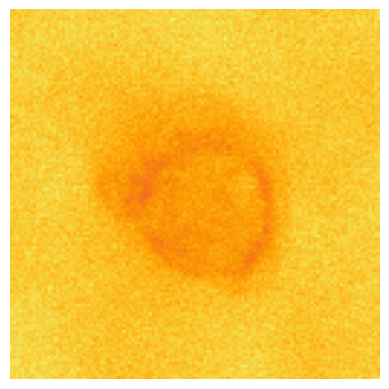

In [45]:
def display_image(image, channel=0):
    plt.imshow(image[:,:,channel], cmap='inferno', vmin=0, vmax=1)
    plt.axis('off')
    plt.show()

# Display the first image, first channel
display_image(images_dataset[0])


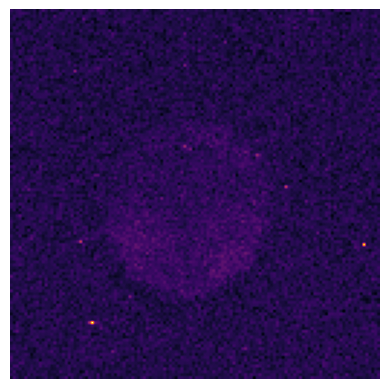

In [52]:
def display_image(image, channel=1):
    plt.imshow(image[:,:,channel], cmap='inferno')
    plt.axis('off')
    plt.show()
display_image(images_dataset[1])

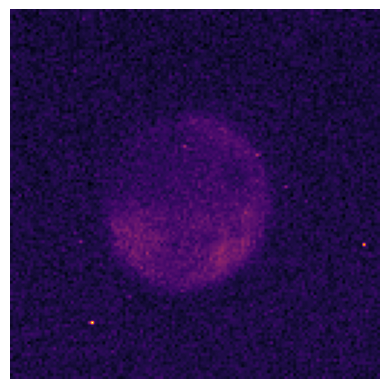

In [53]:
def display_image(image, channel=2):
    plt.imshow(image[:,:,channel], cmap='inferno')
    plt.axis('off')
    plt.show()
display_image(images_dataset[1])

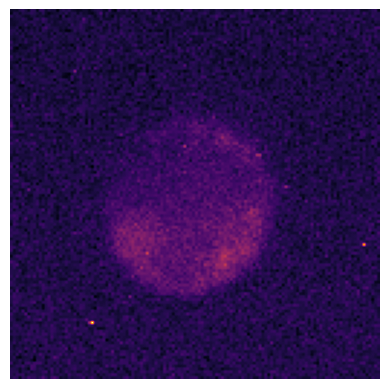

In [54]:
def display_image(image, channel=3):
    plt.imshow(image[:,:,channel], cmap='inferno')
    plt.axis('off')
    plt.show()
display_image(images_dataset[1])

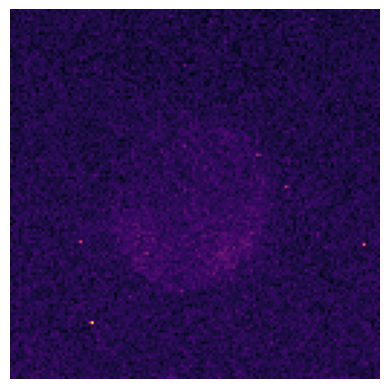

In [55]:
def display_image(image, channel=4):
    plt.imshow(image[:,:,channel], cmap='inferno')
    plt.axis('off')
    plt.show()
display_image(images_dataset[1])

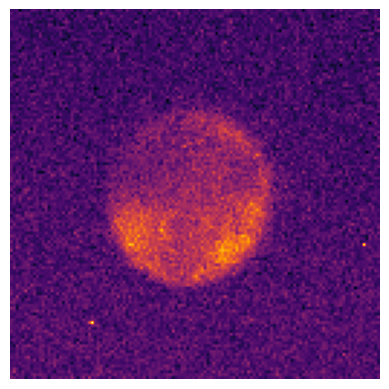

In [56]:
def display_image(image, channel=5):
    plt.imshow(image[:,:,channel], cmap='inferno')
    plt.axis('off')
    plt.show()
display_image(images_dataset[1])

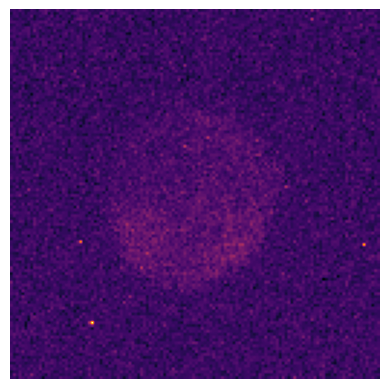

In [57]:
def display_image(image, channel=6):
    plt.imshow(image[:,:,channel], cmap='inferno')
    plt.axis('off')
    plt.show()
display_image(images_dataset[1])